In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import Polynomial as poly
import cmocean
%matplotlib inline
plt.rcParams["font.size"] = 12
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'Dejavu Serif'

In [2]:
# define params

loc = "/scratch/hcm7920/ambData/channelMean/"
loc2="/home/hcm7920/experiments/arcticMiddepthBI/analysis/figData/"

nx = 500
ny = 500
nz = 50
dx = 2000
dy = 2000

g = 9.81
rhoConst = 1000


In [105]:
# load data

saltSteady = np.load(loc+"channelMeanSalt.npy")

levs = np.load(loc+"../grid/gridLevs.npy")
levFaces = np.load(loc+"../grid/gridLevs.npy")

adiaFlux = np.load(loc+"channelMeanAdiaAdvFlux.npy")
diabaticFlux = np.load(loc+"channelMeanDiabaticAdvFlux.npy")

# adiaFlux = adiaFlux + diabaticFlux


### Calculate $\overline{v's'} / \partial_y \overline{s}$

In [106]:
# use modified VSbar DsaltDy kappaCalc from calcadvfluxdecomp.ipynb
DsaltDy = np.gradient(saltSteady,dy,axis=1)[:,100:-100,:]
VSbar = adiaFlux[0,:,100:-100,:]
kappaCalc =  VSbar / DsaltDy
kappaCalc = kappaCalc


/state/partition1/job-49228227/ipykernel_1304240/2817390148.py:4: RuntimeWarning: divide by zero encountered in divide
  kappaCalc =  VSbar / DsaltDy


### Plot contour of the results

Text(0.5, 1.0, "$-\\overline{v's'} / \\partial_y \\overline{s}$, 100% concentration")

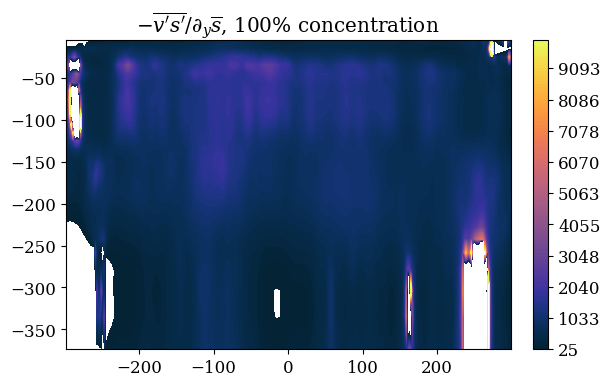

In [107]:
dI = 29
contourLevs = np.linspace(25,10e3,100)
yGrid = np.linspace(-498,498,500)[100:-100]

plt.figure(figsize=(6,3.75),layout="constrained")
plt.contourf(yGrid,levs[:dI],-kappaCalc[:dI,:,-1],contourLevs,
            cmap=cmocean.cm.thermal)
plt.colorbar()
plt.title("$-\overline{v's'} / \partial_y \overline{s}$, 100% concentration")

Text(0.5, 1.0, "$-\\overline{v's'} / \\partial_y \\overline{s}$, 0% concentration")

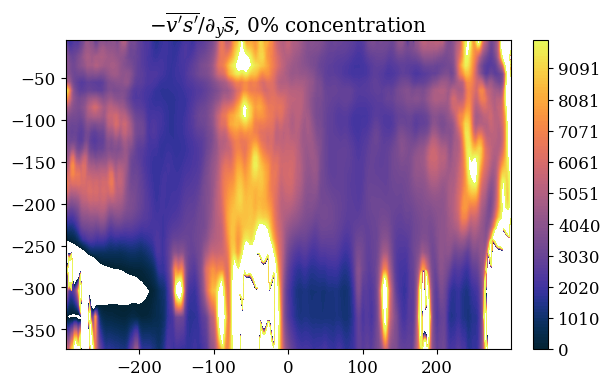

In [108]:
dI = 29
contourLevs = np.linspace(0,10e3,100)
yGrid = np.linspace(-498,498,500)[100:-100]

plt.figure(figsize=(6,3.75),layout="constrained")
plt.contourf(yGrid,levs[:dI],-kappaCalc[:dI,:,0],contourLevs,
            cmap=cmocean.cm.thermal)
plt.colorbar()
plt.title("$-\overline{v's'} / \partial_y \overline{s}$, 0% concentration")

Text(0.5, 1.0, "$-\\overline{v's'} / \\partial_y \\overline{s}$, 40% concentration")

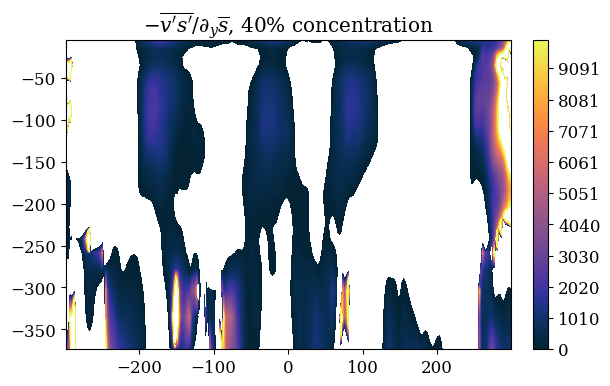

In [109]:
dI = 29
contourLevs = np.linspace(0,10e3,100)
yGrid = np.linspace(-498,498,500)[100:-100]

plt.figure(figsize=(6,3.75),layout="constrained")
plt.contourf(yGrid,levs[:dI],-kappaCalc[:dI,:,2],contourLevs,
            cmap=cmocean.cm.thermal)
plt.colorbar()
plt.title("$-\overline{v's'} / \partial_y \overline{s}$, 40% concentration")

### Scatter plots
### And fit lines

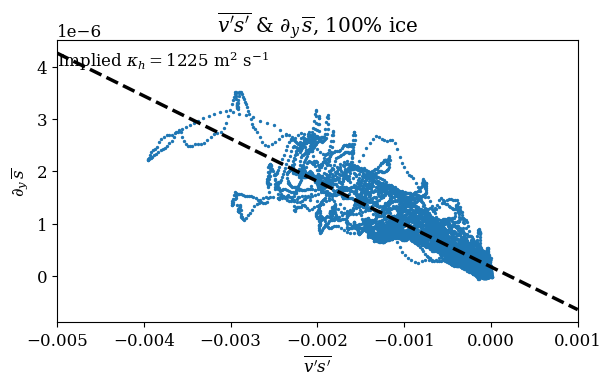

In [110]:
sI = 2
dI = 29
xData = np.ravel(VSbar[sI:dI,:,-1])
yData = np.ravel(DsaltDy[sI:dI,:,-1])
xData[(xData>=0) & (yData>=0)] = 0
yData[(xData>=0) & (yData>=0)] = 0

plt.figure(figsize=(6,3.75),layout="constrained")
plt.scatter(xData,yData,s=2)
plt.xlim([-0.005,0.001])
plt.xlabel("$\overline{v's'}$")
plt.ylabel("$\partial_y \, \overline{s}$")
plt.title("$\overline{v's'}$ & $\partial_y \, \overline{s}$, 100% ice")

seriesFit = poly.fit(xData,yData,1)
lineFit = seriesFit.linspace(5,[-0.005,0.001])
coefFit = seriesFit.convert().coef
myText = f"Implied $\kappa_h = ${round(-1/coefFit[1])}"
myText += " $\mathrm{m}^2$ $\mathrm{s}^{-1}$"
plt.text(-0.005,4e-6,myText)
plt.plot(lineFit[0],lineFit[1],color='k',linestyle='dashed',linewidth=2.5)


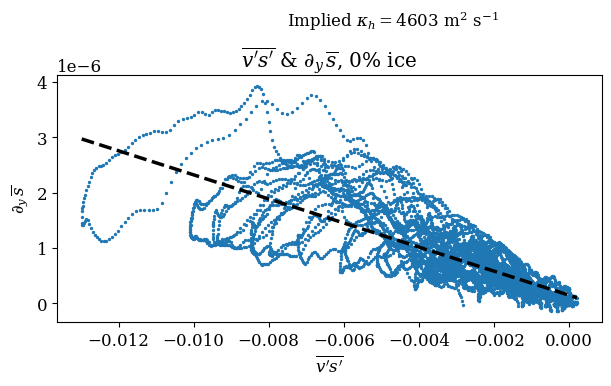

In [111]:
dI = 29
xData = np.ravel(VSbar[sI:dI,:,0])
yData = np.ravel(DsaltDy[sI:dI,:,0])

plt.figure(figsize=(6,3.75),layout="constrained")
plt.scatter(xData,yData,s=2)
plt.xlabel("$\overline{v's'}$")
plt.ylabel("$\partial_y \, \overline{s}$")
plt.title("$\overline{v's'}$ & $\partial_y \, \overline{s}$, 0% ice")

seriesFit = poly.fit(xData,yData,1)
lineFit = seriesFit.linspace(5)
coefFit = seriesFit.convert().coef
myText = f"Implied $\kappa_h = ${round(-1/coefFit[1])}"
myText += " $\mathrm{m}^2$ $\mathrm{s}^{-1}$"
plt.text(-0.0075,5e-6,myText)
plt.plot(lineFit[0],lineFit[1],color='k',linestyle='dashed',linewidth=2.5)


In [112]:
seriesFit.convert().coef

array([ 1.51057457e-07, -2.17234734e-04])

In [113]:
# divided into depth levels

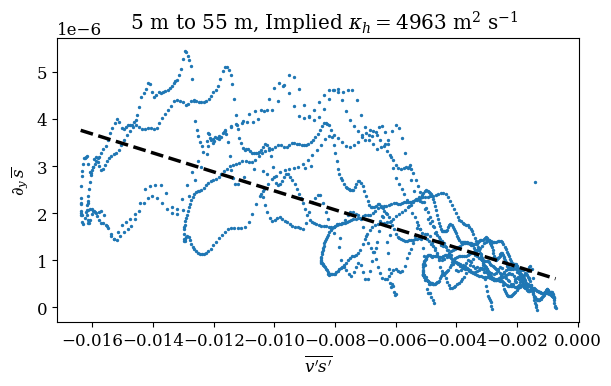

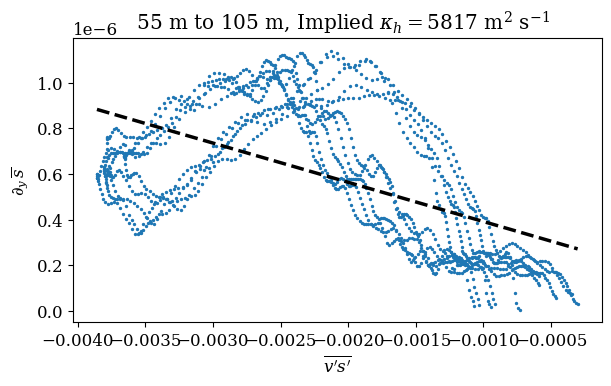

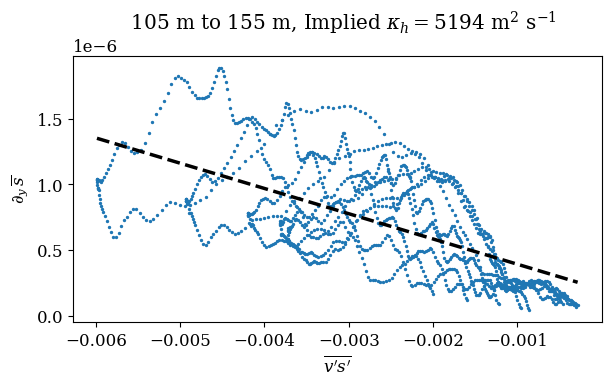

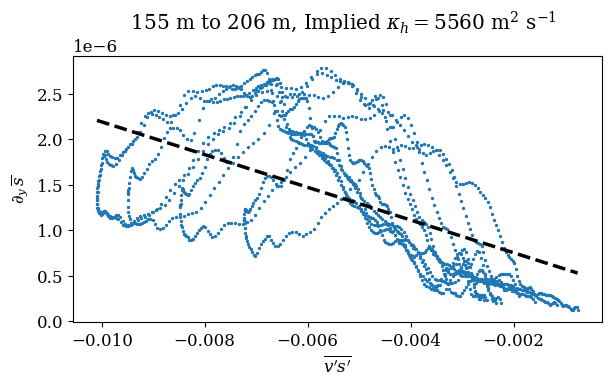

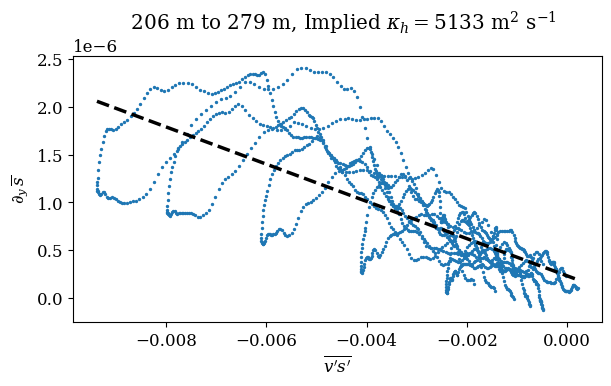

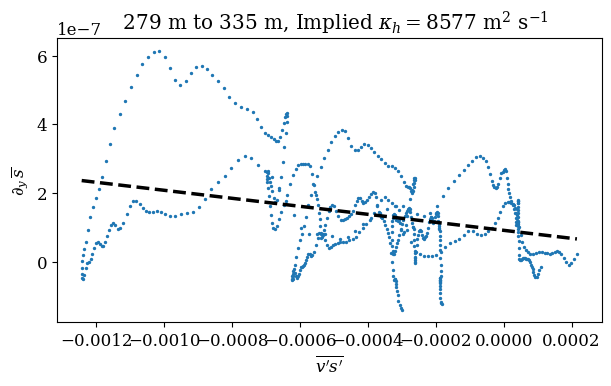

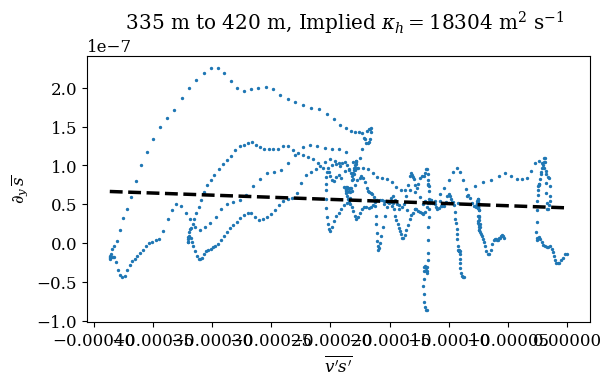

In [114]:
# 0% sea ice 

depthIntervals = [5,5,5,5,5,2,2]
startIndex = 0
for addIndex in depthIntervals:
  endIndex = startIndex + addIndex
  xData = np.ravel(VSbar[startIndex:endIndex,:,0])
  yData = np.ravel(DsaltDy[startIndex:endIndex,:,0])
  
  seriesFit = poly.fit(xData,yData,1)
  lineFit = seriesFit.linspace(5)
  coefFit = seriesFit.convert().coef
  myText = f"Implied $\kappa_h = ${round(-1/coefFit[1])}"
  myText += " $\mathrm{m}^2$ $\mathrm{s}^{-1}$"

  plt.figure(figsize=(6,3.75),layout="constrained")
  plt.plot(lineFit[0],lineFit[1],color='k',linestyle='dashed',linewidth=2.5)
  plt.scatter(xData,yData,s=2)
  plt.xlabel("$\overline{v's'}$")
  plt.ylabel("$\partial_y \, \overline{s}$")
  plt.title(f"  {-levs[startIndex]:.0f} m to {-levs[endIndex]:.0f} m, "
           +myText)

  startIndex = endIndex * 1

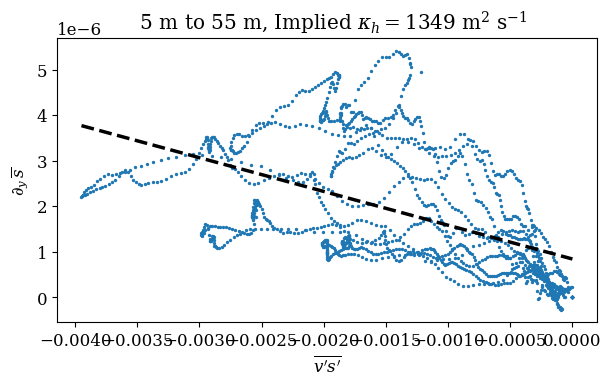

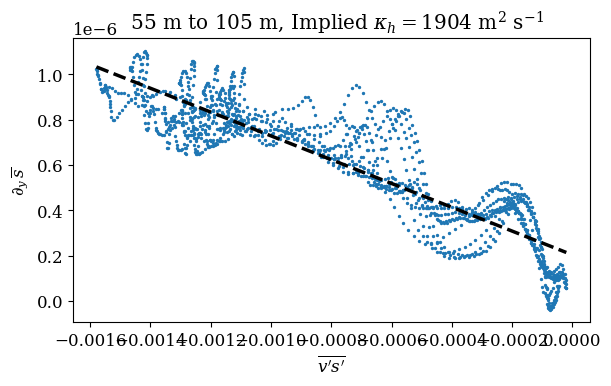

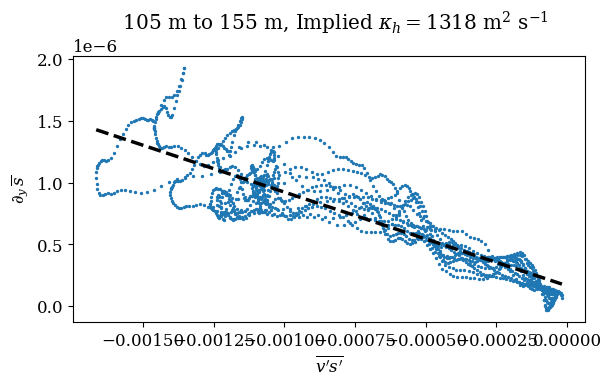

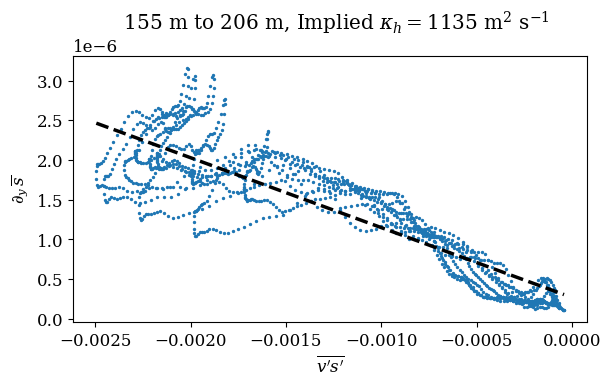

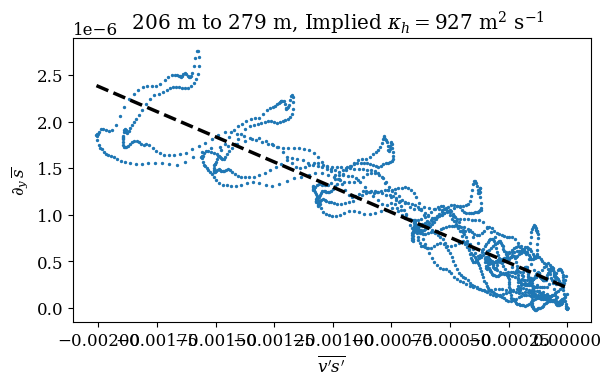

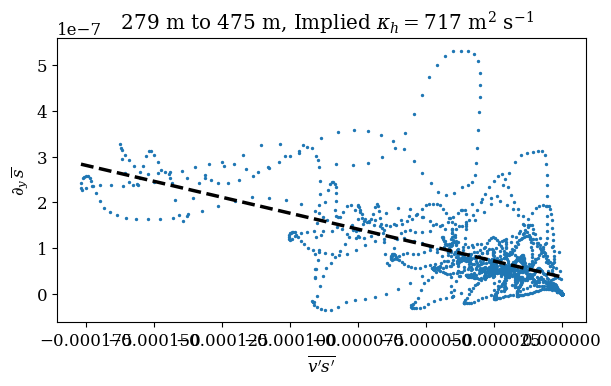

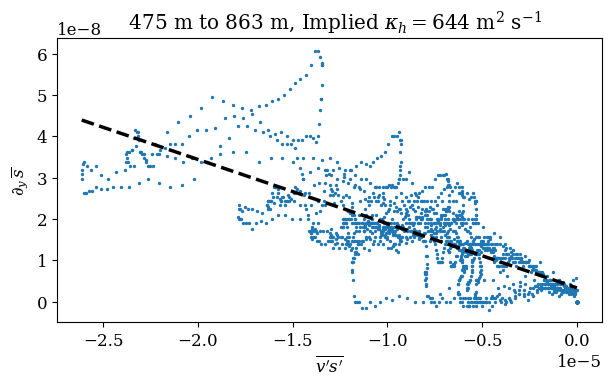

In [115]:
# 100% sea ice

depthIntervals = [5,5,5,5,5,5,5]
startIndex = 0
for addIndex in depthIntervals:
  endIndex = startIndex + addIndex
  xData = np.ravel(VSbar[startIndex:endIndex,:,-1])
  yData = np.ravel(DsaltDy[startIndex:endIndex,:,-1])

  yData[xData>0] = 0
  xData[xData>0] = 0
  
  seriesFit = poly.fit(xData,yData,1)
  lineFit = seriesFit.linspace(5)
  coefFit = seriesFit.convert().coef
  myText = f"Implied $\kappa_h = ${round(-1/coefFit[1])}"
  myText += " $\mathrm{m}^2$ $\mathrm{s}^{-1}$"

  plt.figure(figsize=(6,3.75),layout="constrained")
  plt.plot(lineFit[0],lineFit[1],color='k',linestyle='dashed',linewidth=2.5)
  plt.scatter(xData,yData,s=2)
  plt.xlabel("$\overline{v's'}$")
  plt.ylabel("$\partial_y \, \overline{s}$")
  plt.title(f"  {-levs[startIndex]:.0f} m to {-levs[endIndex]:.0f} m, "
           +myText)

  startIndex = endIndex * 1